# Phase 3: Development Part 1 - Dataset Loading and Preprocessing

**Objective:**

        In this phase, we will begin building the "Measure Energy Consumption" project by loading and preprocessing the dataset obtained from Kaggle. The primary goal is to set up the data and prepare it for further analysis, model development, and visualization.


**Team Details:**

    College Name: Madras Institute of Technology, Anna University

    Team Members:

| Name                        | Email                    | NM ID                                |
|-----------------------------|--------------------------|--------------------------------------|
| Fowzaan Abdur Razzaq Rasheed | fowzaan.rasheed@gmail.com  | 8E4AF1FB4D2CAD089814D6BED938AC27     |
| Mohit S                     | smohit28.04@gmail.com     | B80CBC310CADE36AB9A4F5A439515636    |
| Pronoy Kundu                | pronoykundu513@gmail.com  | 11306F001F2B3639BBE4CB15C475F9EC    |




# STEP 1 : Set up The Environment 

- NumPy (np): Essential for numerical computing, providing arrays, matrices, and mathematical functions.

- Pandas (pd): Used for data manipulation and analysis, particularly for structured data like tables.

- Matplotlib.pyplot (plt): A popular library for creating various data visualizations.

- TensorFlow (tf): An open-source machine learning framework, especially for deep learning.

- sklearn.preprocessing: Part of scikit-learn, it offers tools for data preprocessing, such as scaling and normalization.

- sklearn.metrics: Also from scikit-learn, it provides functions for evaluating model performance, including the r2_score.

- keras.layers: Keras provides layers for building neural networks, such as dense and recurrent layers.

- keras.models: Keras Sequential class for creating neural network models layer by layer.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing
from sklearn.metrics import r2_score
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential
print("Libraries imported successfully")

Libraries imported successfully


# Step 2: Data Import and Loading

- Data Import: The code is using the Pandas library to load two CSV files: 'AEP_hourly.csv' and 'DOM_hourly.csv'. These files likely contain hourly energy consumption data. The pd.read_csv function is used to read the CSV files, and the parse_dates and index_col parameters are specified to parse the 'Datetime' column as datetime objects and set it as the index of the DataFrame.

- Data Loading: Two DataFrames, aep_data and dom_data, are created to hold the data from the respective CSV files. The 'Datetime' column is set as the index, allowing for easy time-based data manipulation.

In [73]:
import pandas as pd

# Load AEP_hourly.csv
aep_data = pd.read_csv('AEP_hourly.csv', parse_dates=['Datetime'], index_col='Datetime')

print("Data loaded successfully.")
print("AEP Data Shape:", aep_data.shape)




Data loaded successfully.
AEP Data Shape: (121273, 1)


**Information About the DataFrame**

In [74]:
print("\nInformation about the dataframe:")
print(aep_data.info())


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB
None


# Step 3 :  Data Cleaning
- Data cleaning is necessary if there are missing values or outliers in the dataset. We can remove rows with missing values using the dropna() function.

In [75]:
# (remove rows with missing values)
aep_data_cleaned = aep_data.dropna()

print("Data cleaned successfully.")
print("AEP Data Shape (Cleaned):", aep_data_cleaned.shape)


Data cleaned successfully.
AEP Data Shape (Cleaned): (121273, 1)


**Summary Of Cleaned Data**

In [76]:
# Display the first few rows of the dataset
print(aep_data_cleaned.head())

# Basic statistics of the numerical columns
print(aep_data_cleaned.describe())


                      AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000


**Before Moving on to the next step , our term performed xporatory Data Analysis to better understand and visualize the data**



**

# Exploratory Data Analysis

**Time Series PLot**

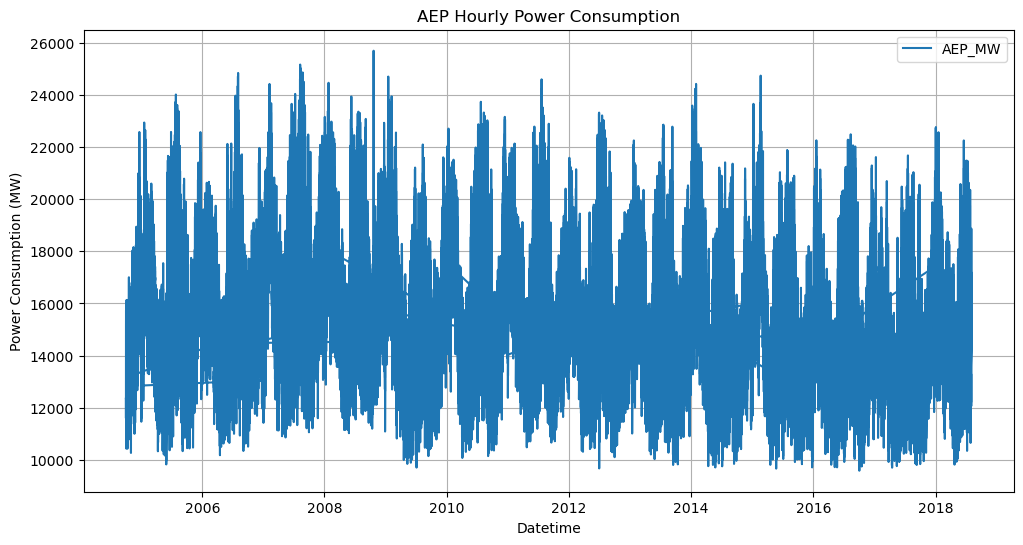

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(aep_data_cleaned.index, aep_data_cleaned['AEP_MW'], label='AEP_MW')
plt.title('AEP Hourly Power Consumption')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (MW)')
plt.legend()
plt.grid(True)
plt.show()


**Histogram**

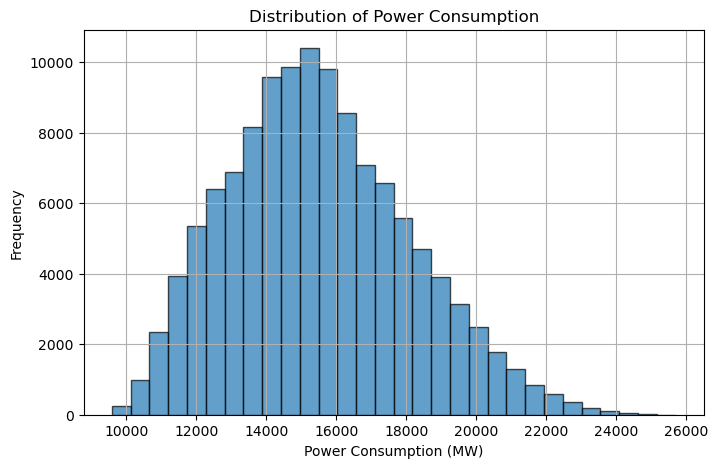

In [78]:
plt.figure(figsize=(8, 5))
plt.hist(aep_data_cleaned['AEP_MW'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Power Consumption')
plt.xlabel('Power Consumption (MW)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Box Plot**

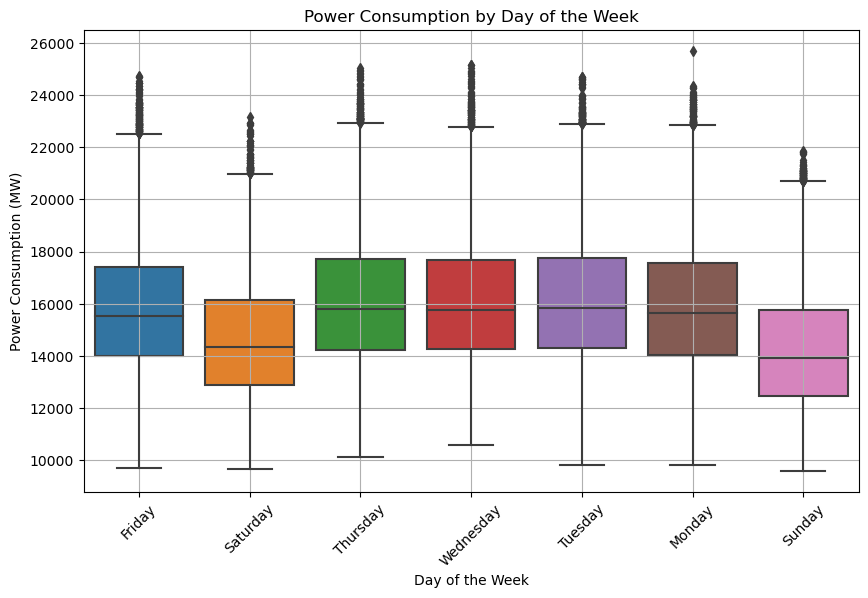

In [79]:
import seaborn as sns
aep_data_cleaned['DayOfWeek'] = aep_data_cleaned.index.day_name()

plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='AEP_MW', data=aep_data_cleaned)
plt.title('Power Consumption by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Power Consumption (MW)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Step 4: Data Splitting
- Split the data into training and testing sets. You can use the train_test_split function from scikit-learn.

In [80]:
from sklearn.model_selection import train_test_split

# Split AEP data into features (X) and target (y)
aep_X = aep_data_cleaned.drop(columns=['AEP_MW'])
aep_y = aep_data_cleaned['AEP_MW']

#(80% train, 20% test)
aep_X_train, aep_X_test, aep_y_train, aep_y_test = train_test_split(aep_X, aep_y, test_size=0.2, random_state=42)


print("Data split successfully.")
print("AEP Train Data Shape (X, y):", aep_X_train.shape, aep_y_train.shape)
print("AEP Test Data Shape (X, y):", aep_X_test.shape, aep_y_test.shape)


Data split successfully.
AEP Train Data Shape (X, y): (97018, 1) (97018,)
AEP Test Data Shape (X, y): (24255, 1) (24255,)


**Training vs Testing Data**

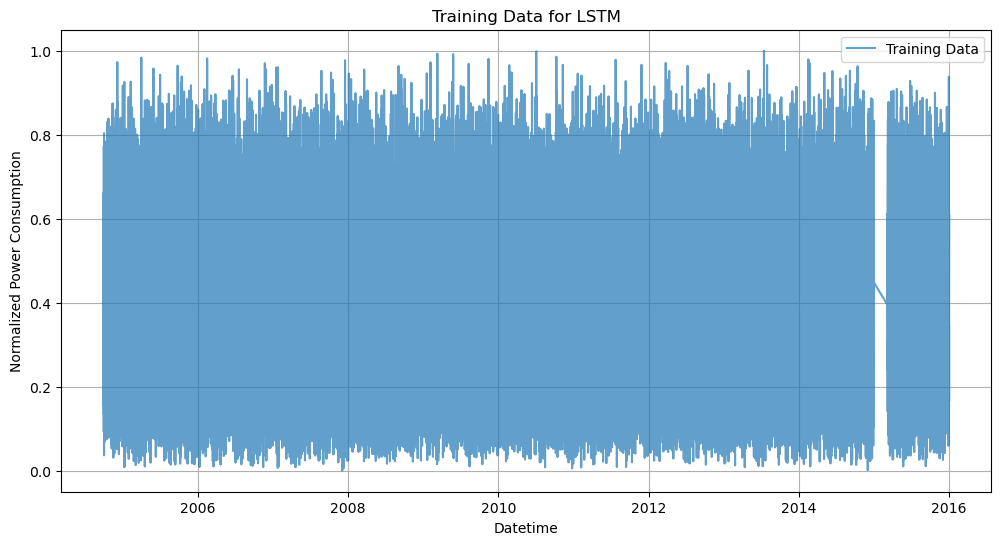

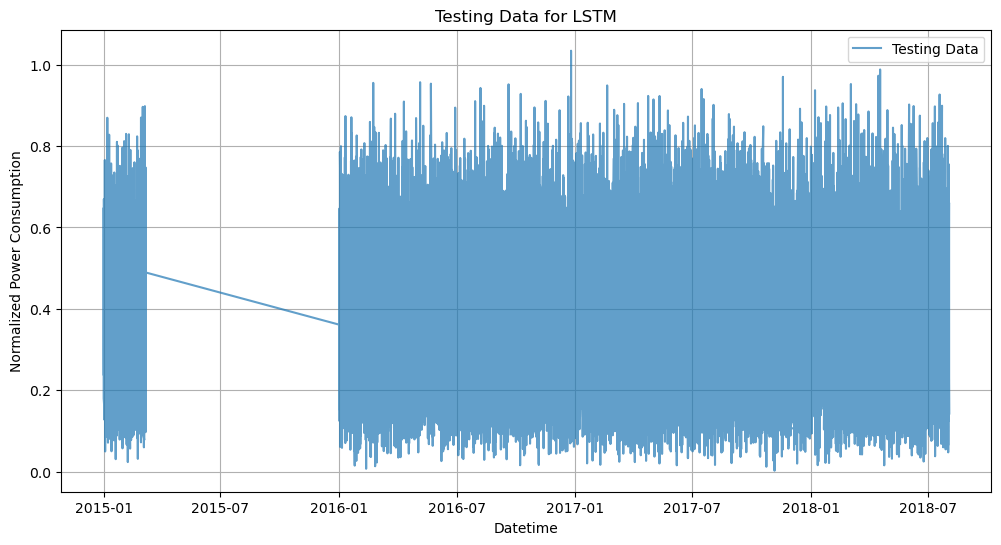

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(aep_data_cleaned.index[:len(aep_X_train_lstm)], aep_y_train_lstm, label='Training Data', alpha=0.7)
plt.title('Training Data for LSTM')
plt.xlabel('Datetime')
plt.ylabel('Normalized Power Consumption')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(aep_data_cleaned.index[-len(aep_y_test_lstm):], aep_y_test_lstm, label='Testing Data', alpha=0.7)
plt.title('Testing Data for LSTM')
plt.xlabel('Datetime')
plt.ylabel('Normalized Power Consumption')
plt.legend()
plt.grid(True)
plt.show()


# Step 5: Data Normalization
- Normalize the data using Min-Max scaling. Here we normalize the 'AEP_MW' column.

In [82]:
from sklearn.preprocessing import MinMaxScaler

# Normalize AEP data using Min-Max scaling
aep_scaler = MinMaxScaler()
aep_y_train_normalized = aep_scaler.fit_transform(aep_y_train.values.reshape(-1, 1))
aep_y_test_normalized = aep_scaler.transform(aep_y_test.values.reshape(-1, 1))

print("First 3 lines of normalized AEP training data:")
print(aep_y_train_normalized[:3])

print("First 3 lines of normalized AEP testing data:")
print(aep_y_test_normalized[:3])



print("Data normalized successfully.")


First 3 lines of normalized AEP training data:
[[0.35987936]
 [0.3632805 ]
 [0.15074119]]
First 3 lines of normalized AEP testing data:
[[0.61932876]
 [0.23865751]
 [0.44760316]]
Data normalized successfully.


**Comparison Of Data After Normalization**

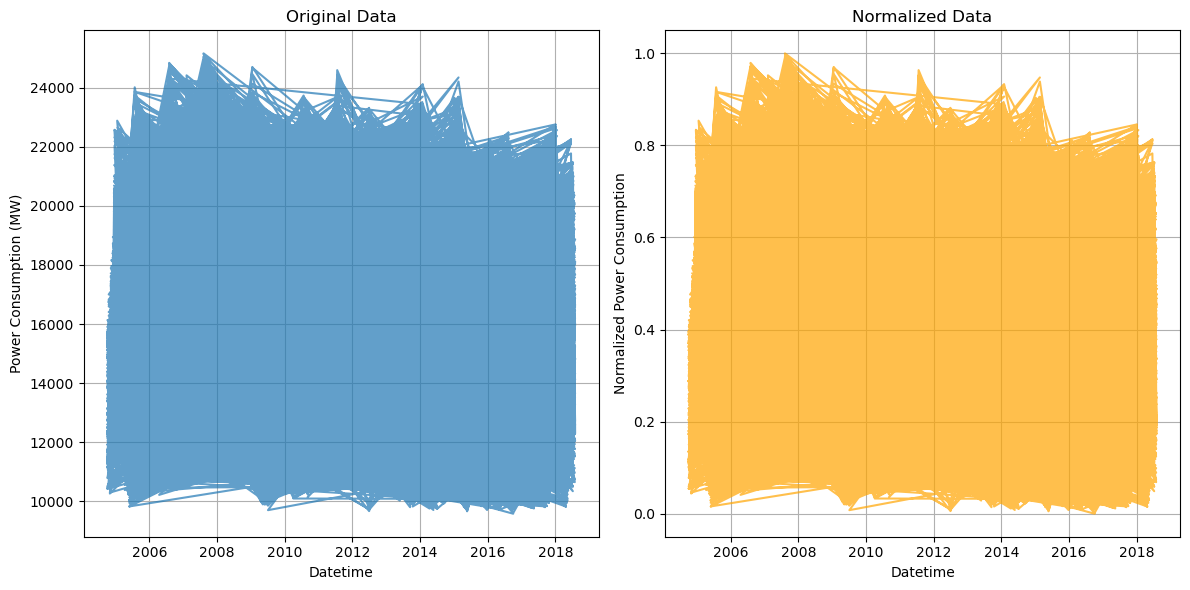

In [83]:
# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 2, 1)
plt.plot(aep_y_train.index, aep_y_train, label='Original Data', alpha=0.7)
plt.title('Original Data')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (MW)')
plt.grid(True)

# Normalized Data
plt.subplot(1, 2, 2)
plt.plot(aep_y_train.index, aep_y_train_normalized, label='Normalized Data', alpha=0.7, color='orange')
plt.title('Normalized Data')
plt.xlabel('Datetime')
plt.ylabel('Normalized Power Consumption')
plt.grid(True)

plt.tight_layout()  # Adjust subplot layout for a cleaner display

plt.show()


# Step 6: Data Reshaping 

- We Need to reshape the data into a 3D array to use the LSTM model 

In [84]:
# Reshape the data for LSTM by using past 24 hours to predict the next hour
sequence_length = 24

def create_sequences(X, y, sequence_length):
    X_sequences, y_sequences = [], []
    for i in range(len(X) - sequence_length):
        X_sequences.append(X.iloc[i:i+sequence_length].values)
        y_sequences.append(y[i+sequence_length])
    return np.array(X_sequences), np.array(y_sequences)

aep_X_train_lstm, aep_y_train_lstm = create_sequences(aep_X_train, aep_y_train_normalized, sequence_length)
aep_X_test_lstm, aep_y_test_lstm = create_sequences(aep_X_test, aep_y_test_normalized, sequence_length)


print("Data reshaped for LSTM successfully.")
print("AEP Train Data Shape (LSTM):", aep_X_train_lstm.shape, aep_y_train_lstm.shape)
print("AEP Test Data Shape (LSTM):", aep_X_test_lstm.shape, aep_y_test_lstm.shape)


Data reshaped for LSTM successfully.
AEP Train Data Shape (LSTM): (96994, 24, 1) (96994, 1)
AEP Test Data Shape (LSTM): (24231, 24, 1) (24231, 1)


**Data After Reshaping**

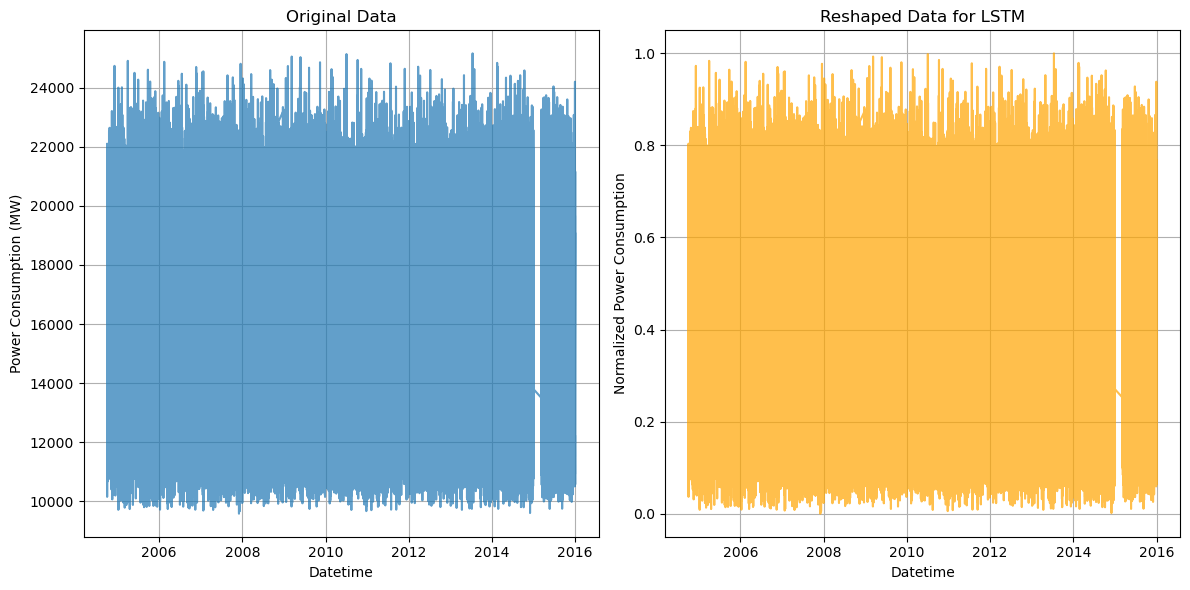

In [85]:

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Original Data
plt.subplot(1, 2, 1)
plt.plot(aep_data_cleaned.index[:len(aep_y_train)], aep_y_train, label='Original Data', alpha=0.7)
plt.title('Original Data')
plt.xlabel('Datetime')
plt.ylabel('Power Consumption (MW)')
plt.grid(True)

# Reshaped Data for LSTM
plt.subplot(1, 2, 2)
plt.plot(aep_data_cleaned.index[sequence_length:sequence_length + len(aep_y_train_lstm)], aep_y_train_lstm, label='Reshaped Data (LSTM)', alpha=0.7, color='orange')
plt.title('Reshaped Data for LSTM')
plt.xlabel('Datetime')
plt.ylabel('Normalized Power Consumption')
plt.grid(True)

plt.tight_layout()  # Adjust subplot layout for a cleaner display

plt.show()


# CONCLUSION OF PHASE 3

In Phase 3, we prepared our energy consumption data for machine learning. We cleaned the dataset, split it for training and testing, and normalized it for model compatibility. We visualized data transformations before and after normalization and reshaping for LSTM modeling. These steps set the stage for our upcoming model development in Phase 4.